# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></div><div class="lev1 toc-item"><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></div><div class="lev1 toc-item"><a href="#Read-imcat-output-file-final_text.txt" data-toc-modified-id="Read-imcat-output-file-final_text.txt-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read imcat output file final_text.txt</a></div><div class="lev1 toc-item"><a href="#Add-additional-columns-for-plotting" data-toc-modified-id="Add-additional-columns-for-plotting-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Add additional columns for plotting</a></div><div class="lev1 toc-item"><a href="#Plot-g-squared-for-monochromatic-and-chromatic-files" data-toc-modified-id="Plot-g-squared-for-monochromatic-and-chromatic-files-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plot g-squared for monochromatic and chromatic files</a></div><div class="lev1 toc-item"><a href="#Verify-New-filtering-in-one-of-the-text-files-of-dmstack_text" data-toc-modified-id="Verify-New-filtering-in-one-of-the-text-files-of-dmstack_text-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Verify New filtering in one of the text files of dmstack_text</a></div>

# Introduction
Date: Nov 19, 2019

**Update Nov 19**  
Reference: https://github.com/LSSTDESC/DC2-analysis/blob/master/tutorials/object_gcr_2_lensing_cuts.ipynb
- When creating dmstack_txt from dmstack_csv, we applied two more filters for shape measurements.
```python
    df = df.query('ext_shapeHSM_HsmShapeRegauss_resolution >= 0.3')
    df = df.query('ext_shapeHSM_HsmShapeRegauss_sigma <= 0.4')
```

**IMCAT Script to get final_text.txt from dmstack_txt**
1. Added two new columns to imcat output catalog
```bash
lc -b +all 
'x = %x[0][0] %x[1][0] + %x[2][0] + %x[3][0] + 4 / %x[0][1] %x[1][1] + %x[2][1] + %x[3][1] + 4 / 2 vector'
'gm = %g[0][0] %g[1][0] + 2 / %g[0][1] %g[1][1] + 2 / 2 vector' 
'gc = %g[2][0] %g[3][0] + 2 / %g[2][1] %g[3][1] + 2 / 2 vector'   
'gmd = %g[0][0] %g[1][0] - 2 / %g[0][1] %g[1][1] - 2 / 2 vector' 
'gcd = %g[2][0] %g[3][0] - 2 / %g[2][1] %g[3][1] - 2 / 2 vector' 
< ${catalogs}/merge.cat > ${final}/final_${i}.cat
```


**Usual Filtering**

```python
column ==> deblend_nChild == 0.0
ellipticity ==> ellip < 1.5
nans ==> if nans in cols_select, remove row

where,
cols_select = ['base_SdssCentroid_x', 'base_SdssCentroid_y',
       'base_SdssCentroid_xSigma','base_SdssCentroid_ySigma',
       'ext_shapeHSM_HsmShapeRegauss_e1','ext_shapeHSM_HsmShapeRegauss_e2',
        'base_SdssShape_flux']
```

**Notes**
- In IMCAT scripts, the quantity g is actually e. True g is g/2 in weak lensing limit.

# Imports

In [1]:
import json, os,sys
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

pd.set_option('display.max_columns',200)

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
if not os.path.isdir('images'):
    os.makedirs('images')

# Read imcat output file final_text.txt

In [3]:
!head -2 ../data/final/final_text.txt

#       fN[0][0]       fN[1][0]       fN[2][0]       fN[3][0]       id[0][0]       id[1][0]       id[2][0]       id[3][0]           x[0]           x[1]     errx[0][0]     errx[0][1]     errx[1][0]     errx[1][1]     errx[2][0]     errx[2][1]     errx[3][0]     errx[3][1]        g[0][0]        g[0][1]        g[1][0]        g[1][1]        g[2][0]        g[2][1]        g[3][0]        g[3][1]    ellip[0][0]    ellip[1][0]    ellip[2][0]    ellip[3][0]     flux[0][0]     flux[1][0]     flux[2][0]     flux[3][0]   radius[0][0]   radius[1][0]   radius[2][0]   radius[3][0]          gm[0]          gm[1]          gc[0]          gc[1]         gmd[0]         gmd[1]         gcd[0]         gcd[1]
               0              0              0              0           5301           5314           5231           5117       88.17075      1847.1934         0.0196         0.0249         0.0227         0.0216           0.02         0.0256         0.0231          0.022        -0.4253         0.1855       

In [4]:
names = "fN[0][0]       fN[1][0]       fN[2][0]       fN[3][0]       id[0][0]       id[1][0]       id[2][0]       id[3][0]           x[0]           x[1]     errx[0][0]     errx[0][1]     errx[1][0]     errx[1][1]     errx[2][0]     errx[2][1]     errx[3][0]     errx[3][1]        g[0][0]        g[0][1]        g[1][0]        g[1][1]        g[2][0]        g[2][1]        g[3][0]        g[3][1]    ellip[0][0]    ellip[1][0]    ellip[2][0]    ellip[3][0]     flux[0][0]     flux[1][0]     flux[2][0]     flux[3][0]   radius[0][0]   radius[1][0]   radius[2][0]   radius[3][0]          gm[0]          gm[1]          gc[0]          gc[1]         gmd[0]         gmd[1]         gcd[0]         gcd[1]".split()
print(names)

['fN[0][0]', 'fN[1][0]', 'fN[2][0]', 'fN[3][0]', 'id[0][0]', 'id[1][0]', 'id[2][0]', 'id[3][0]', 'x[0]', 'x[1]', 'errx[0][0]', 'errx[0][1]', 'errx[1][0]', 'errx[1][1]', 'errx[2][0]', 'errx[2][1]', 'errx[3][0]', 'errx[3][1]', 'g[0][0]', 'g[0][1]', 'g[1][0]', 'g[1][1]', 'g[2][0]', 'g[2][1]', 'g[3][0]', 'g[3][1]', 'ellip[0][0]', 'ellip[1][0]', 'ellip[2][0]', 'ellip[3][0]', 'flux[0][0]', 'flux[1][0]', 'flux[2][0]', 'flux[3][0]', 'radius[0][0]', 'radius[1][0]', 'radius[2][0]', 'radius[3][0]', 'gm[0]', 'gm[1]', 'gc[0]', 'gc[1]', 'gmd[0]', 'gmd[1]', 'gcd[0]', 'gcd[1]']


In [5]:
names = ['fN[0][0]', 'fN[1][0]', 'fN[2][0]', 'fN[3][0]', 
         'id[0][0]', 'id[1][0]', 'id[2][0]', 'id[3][0]',
         'x[0]', 'x[1]', 'errx[0][0]', 'errx[0][1]', 'errx[1][0]',
         'errx[1][1]', 'errx[2][0]', 'errx[2][1]', 'errx[3][0]',
         'errx[3][1]', 'g[0][0]', 'g[0][1]', 'g[1][0]', 'g[1][1]',
         'g[2][0]', 'g[2][1]', 'g[3][0]', 'g[3][1]',
         'ellip[0][0]', 'ellip[1][0]', 'ellip[2][0]', 'ellip[3][0]',
         'flux[0][0]', 'flux[1][0]', 'flux[2][0]', 'flux[3][0]',
         'radius[0][0]', 'radius[1][0]', 'radius[2][0]', 'radius[3][0]',
         'gm[0]', 'gm[1]', 'gc[0]', 'gc[1]',
         'gmd[0]', 'gmd[1]', 'gcd[0]', 'gcd[1]']


file_path = f'../data/final/final_text.txt'


df = pd.read_csv(file_path,comment='#',engine='python',sep=r'\s\s+',
                 header=None,names=names)

print(df.shape)
df.head()

(56235, 46)


,fN[0][0],fN[1][0],fN[2][0],fN[3][0],id[0][0],id[1][0],id[2][0],id[3][0],x[0],x[1],errx[0][0],errx[0][1],errx[1][0],errx[1][1],errx[2][0],errx[2][1],errx[3][0],errx[3][1],g[0][0],g[0][1],g[1][0],g[1][1],g[2][0],g[2][1],g[3][0],g[3][1],ellip[0][0],ellip[1][0],ellip[2][0],ellip[3][0],flux[0][0],flux[1][0],flux[2][0],flux[3][0],radius[0][0],radius[1][0],radius[2][0],radius[3][0],gm[0],gm[1],gc[0],gc[1],gmd[0],gmd[1],gcd[0],gcd[1]
0,0,0,0,0,5301,5314,5231,5117,88.17075,1847.19340,0.0196,0.0249,0.0227,0.0216,0.0200,0.0256,0.0231,0.0220,-0.4253,0.1855,0.2730,-0.3021,-0.4257,0.1904,0.2778,-0.3155,0.463994,0.407177,0.466340,0.420373,79841.4700,82737.3540,80303.9230,83923.9080,5.186953,5.293858,5.267827,5.390682,-0.07615,-0.05830,-0.07395,-0.06255,-0.34915,0.24380,-0.35175,0.25295
1,0,0,0,0,3941,3957,3897,3923,3214.45390,930.33603,0.0344,0.0212,0.0331,0.0232,0.0344,0.0212,0.0332,0.0232,0.9068,0.3231,0.7867,0.3391,0.9179,0.3265,0.7956,0.3416,0.962642,0.856671,0.974240,0.865835,33913.5470,34112.9040,33903.5430,34114.7980,4.676457,4.750963,4.675408,4.751770,0.84675,0.33110,0.85675,0.33405,0.06005,-0.00800,0.06115,-0.00755
2,0,0,0,0,1301,1310,1323,1312,2652.56650,1772.34480,0.2510,0.1715,0.1663,0.3002,0.2522,0.1715,0.1665,0.3017,0.9614,0.5881,-0.9979,-0.4635,1.0062,0.6076,-1.0206,-0.4729,1.127010,1.100289,1.175422,1.124837,3694.2411,3674.4453,3684.1640,3663.4596,4.161950,4.303319,4.159870,4.301257,-0.01825,0.06230,-0.00720,0.06735,0.97965,0.52580,1.01340,0.54025
3,0,0,0,0,3564,3564,3541,3538,2536.84490,712.48793,0.0071,0.0125,0.0071,0.0129,0.0074,0.0129,0.0074,0.0134,-1.0289,0.4499,-1.0196,0.3961,-0.9862,0.4332,-0.9816,0.3755,1.122963,1.093837,1.077150,1.050970,107866.5700,109330.9900,109214.9900,110405.2400,4.848973,4.967938,4.963241,5.096215,-1.02425,0.42300,-0.98390,0.40435,-0.00465,0.02690,-0.00230,0.02885
4,0,0,0,0,4634,4659,4569,4615,109.82575,1405.32120,0.3760,0.3919,0.2353,0.2783,0.3803,0.3949,0.2379,0.2831,0.2055,0.1655,-0.1817,-0.0868,0.2052,0.1698,-0.1773,-0.0987,0.263857,0.201368,0.266344,0.202921,3512.8911,3518.9333,3517.0462,3518.1529,4.338535,4.362407,4.374177,4.392268,0.01190,0.03935,0.01395,0.03555,0.19360,0.12615,0.19125,0.13425


# Add additional columns for plotting

In [6]:
# new columns

df['gsq'] = df['g[0][0]'] **2 + df['g[0][1]']**2
df['gmdsq'] = df['gmd[0]'] **2 + df['gmd[1]']**2

df['gmsq'] = df['gm[0]']**2 + df['gm[1]']**2
df['gcsq'] = df['gc[0]']**2 + df['gc[1]']**2


In [7]:
df.head()

,fN[0][0],fN[1][0],fN[2][0],fN[3][0],id[0][0],id[1][0],id[2][0],id[3][0],x[0],x[1],errx[0][0],errx[0][1],errx[1][0],errx[1][1],errx[2][0],errx[2][1],errx[3][0],errx[3][1],g[0][0],g[0][1],g[1][0],g[1][1],g[2][0],g[2][1],g[3][0],g[3][1],ellip[0][0],ellip[1][0],ellip[2][0],ellip[3][0],flux[0][0],flux[1][0],flux[2][0],flux[3][0],radius[0][0],radius[1][0],radius[2][0],radius[3][0],gm[0],gm[1],gc[0],gc[1],gmd[0],gmd[1],gcd[0],gcd[1],gsq,gmdsq,gmsq,gcsq
0,0,0,0,0,5301,5314,5231,5117,88.17075,1847.19340,0.0196,0.0249,0.0227,0.0216,0.0200,0.0256,0.0231,0.0220,-0.4253,0.1855,0.2730,-0.3021,-0.4257,0.1904,0.2778,-0.3155,0.463994,0.407177,0.466340,0.420373,79841.4700,82737.3540,80303.9230,83923.9080,5.186953,5.293858,5.267827,5.390682,-0.07615,-0.05830,-0.07395,-0.06255,-0.34915,0.24380,-0.35175,0.25295,0.215290,0.181344,0.009198,0.009381
1,0,0,0,0,3941,3957,3897,3923,3214.45390,930.33603,0.0344,0.0212,0.0331,0.0232,0.0344,0.0212,0.0332,0.0232,0.9068,0.3231,0.7867,0.3391,0.9179,0.3265,0.7956,0.3416,0.962642,0.856671,0.974240,0.865835,33913.5470,34112.9040,33903.5430,34114.7980,4.676457,4.750963,4.675408,4.751770,0.84675,0.33110,0.85675,0.33405,0.06005,-0.00800,0.06115,-0.00755,0.926680,0.003670,0.826613,0.845610
2,0,0,0,0,1301,1310,1323,1312,2652.56650,1772.34480,0.2510,0.1715,0.1663,0.3002,0.2522,0.1715,0.1665,0.3017,0.9614,0.5881,-0.9979,-0.4635,1.0062,0.6076,-1.0206,-0.4729,1.127010,1.100289,1.175422,1.124837,3694.2411,3674.4453,3684.1640,3663.4596,4.161950,4.303319,4.159870,4.301257,-0.01825,0.06230,-0.00720,0.06735,0.97965,0.52580,1.01340,0.54025,1.270152,1.236180,0.004214,0.004588
3,0,0,0,0,3564,3564,3541,3538,2536.84490,712.48793,0.0071,0.0125,0.0071,0.0129,0.0074,0.0129,0.0074,0.0134,-1.0289,0.4499,-1.0196,0.3961,-0.9862,0.4332,-0.9816,0.3755,1.122963,1.093837,1.077150,1.050970,107866.5700,109330.9900,109214.9900,110405.2400,4.848973,4.967938,4.963241,5.096215,-1.02425,0.42300,-0.98390,0.40435,-0.00465,0.02690,-0.00230,0.02885,1.261045,0.000745,1.228017,1.131558
4,0,0,0,0,4634,4659,4569,4615,109.82575,1405.32120,0.3760,0.3919,0.2353,0.2783,0.3803,0.3949,0.2379,0.2831,0.2055,0.1655,-0.1817,-0.0868,0.2052,0.1698,-0.1773,-0.0987,0.263857,0.201368,0.266344,0.202921,3512.8911,3518.9333,3517.0462,3518.1529,4.338535,4.362407,4.374177,4.392268,0.01190,0.03935,0.01395,0.03555,0.19360,0.12615,0.19125,0.13425,0.069621,0.053395,0.001690,0.001458


# Plot g-squared for monochromatic and chromatic files

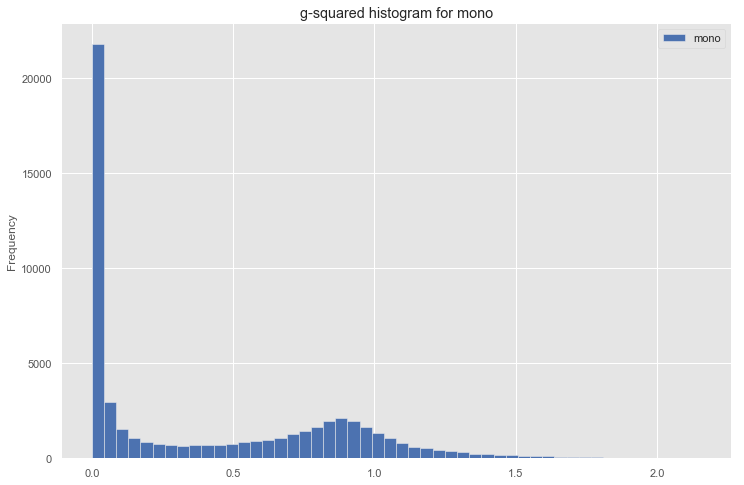

In [15]:
df['gmsq'].plot.hist(bins=50,figsize=(12,8),color='b',label='mono')

plt.legend()
plt.title('g-squared histogram for mono')
plt.savefig('images/gmsq_hist.png')

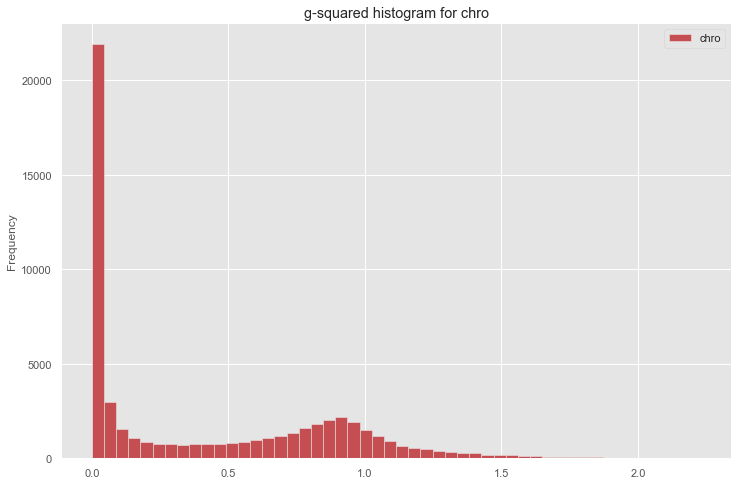

In [16]:
df['gcsq'].plot.hist(bins=50,figsize=(12,8),color='r',label='chro')

plt.legend()
plt.title('g-squared histogram for chro')
plt.savefig('images/gcsq_hist.png')